In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archiveupdate.zip'

Streaming output truncated to the last 5000 lines.
  inflating: archiveupdate/train/labels/_-85-_mp4-11_jpg.rf.8c3956d75405b00abb75ea377cb4e45c.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-12_jpg.rf.84c98470d0db1f30ce845dc556e4f110.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-13_jpg.rf.bec833e817b50df06b860377aca8f51a.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-15_jpg.rf.1028f7955a65c5e2914199ec3c69f8bf.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-16_jpg.rf.69cc4a6e31ef85d5698f657c201dc012.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-17_jpg.rf.d3744b11009bba4687f8047cc0bbfa0f.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-19_jpg.rf.58d491a24276a81b85645989cd1233d2.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-29_jpg.rf.8eaf8b3aac4acb0ed6b9a4a9d0b7d7ee.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-2_jpg.rf.9abfc38c069dff493ff0d78805c6b924.txt  
  inflating: archiveupdate/train/labels/_-85-_mp4-30_jpg.rf

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

Showing images with bounding boxes for class: Open Eye


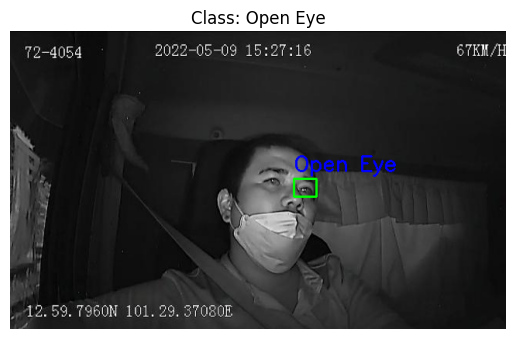

Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt


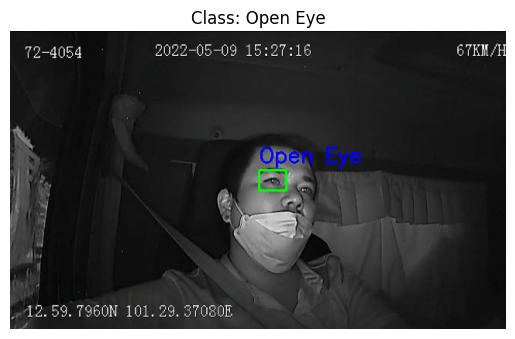

Showing images with bounding boxes for class: Closed Eye
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt


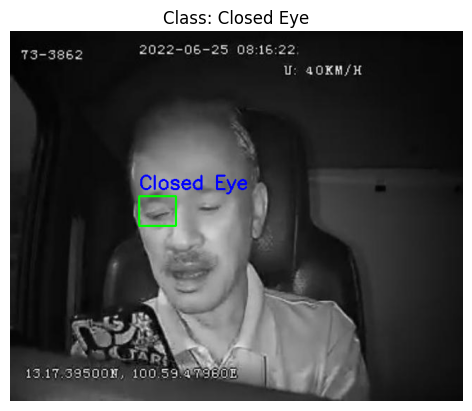

Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt


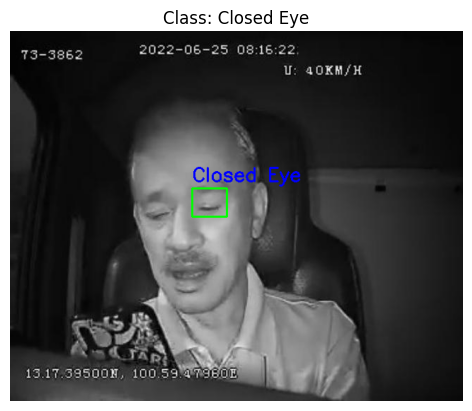

Showing images with bounding boxes for class: Cigarette
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-15-_mp4-67_jpg.rf.2ccfe6de8f81af47ff9e6fff0c364dfb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-15-_mp4-67_jpg.rf.2ccfe6de8f81af47ff9e6fff0c364dfb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-13-_mp4-66_jpg.rf.1cf214af1dec3dd287d36d322f700741.txt
Skipping malformed label in

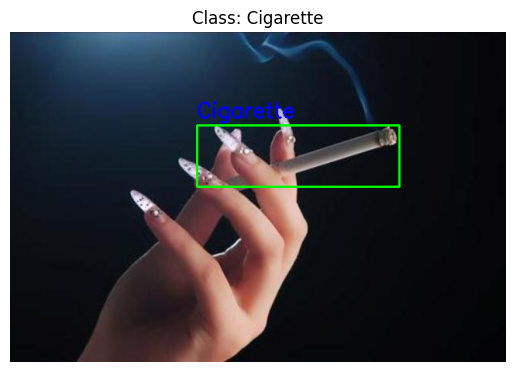

Skipping malformed label in /content/archiveupdate/valid/labels/_-11-_mp4-24_jpg.rf.b3c321d602d3495beee57102ff66cd78.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-11-_mp4-24_jpg.rf.b3c321d602d3495beee57102ff66cd78.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_04_20220812145625_20220812145635_mp4-40_jpg.rf.ac33754487467dad6f86fa8e4c38ca48.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_04_20220812145625_20220812145635_mp4-40_jpg.rf.ac33754487467dad6f86fa8e4c38ca48.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_05_20220722131125_20220722131135_mp4-51_jpg.rf.3785ae2a279d42e9cf6757834965db3e.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_05_20220722131125_20220722131135_mp4-51_jpg.rf.3785ae2a279d42e9cf6757834965db3e.txt
Skipping malformed label in /content/archiveupdate/valid/labels/c_-254-_jpg.rf.9c0bade8ff0811f224f6e0ffbe38c179.txt
Skipping malformed

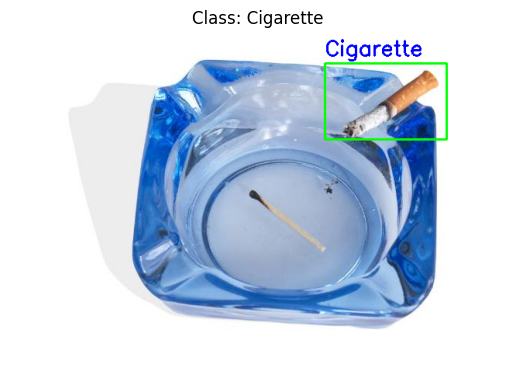

Showing images with bounding boxes for class: Phone
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt


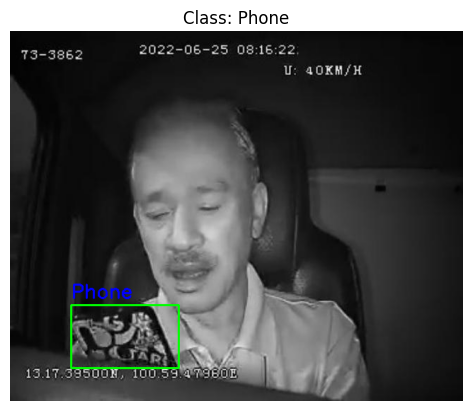

Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt


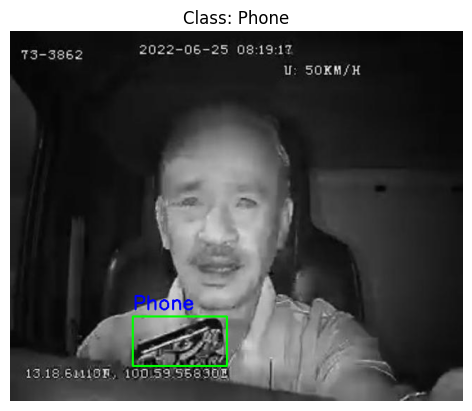

Showing images with bounding boxes for class: Seatbelt


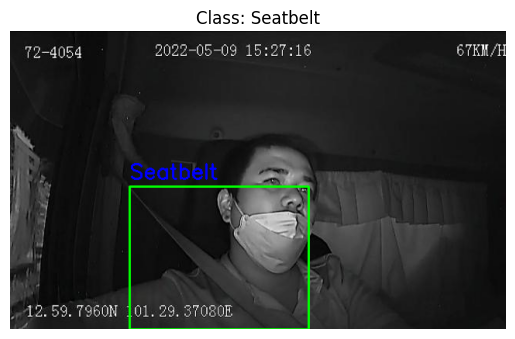

Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/CHANNEL_03_20220509152715_20220509152725_mp4-14_jpg.rf.74572472955c74a9cb1922cd29546aeb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-14-_mp4-40_jpg.rf.e934d54e4b694dd105461308aa17b349.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-15-_mp4-67_jpg.rf.2ccfe6de8f81af47ff9e6fff0c364dfb.txt
Skipping malformed label in /content/archiveupdate/valid/labels/_-15-_mp4-67_jpg.rf.2ccfe6de8f81af47ff9e6fff0c364dfb.txt


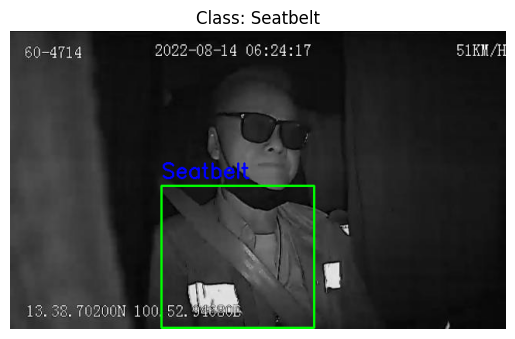

In [ ]:
image_folder = '/content/archiveupdate/valid/images/'
label_folder = '/content/archiveupdate/valid/labels/'

class_names = ['Open Eye', 'Closed Eye', 'Cigarette', 'Phone', 'Seatbelt']

def show_images_with_boxes(class_name, image_dir, num_images=2):
    # Get all image files
    image_files = os.listdir(image_dir)

    # Initialize a counter for images shown
    count = 0

    # Iterate over the images
    for img_file in image_files:
        # Load the corresponding label file
        label_file = img_file.replace('.jpg', '.txt')

        label_path = os.path.join(label_folder, label_file)
        if not os.path.exists(label_path):
            continue  # Skip if the label file does not exist

        # Open the label file and check if the class is present in the labels
        with open(label_path, 'r') as file:
            labels = file.readlines()
            for label in labels:
                # Ensure the label line is not empty and has the correct format
                if len(label.split()) < 5:
                    print(f"Skipping malformed label in {label_path}")
                    continue

                try:
                    # Extract YOLO format values
                    class_id, x_center, y_center, width, height = map(float, label.split())
                except (IndexError, ValueError):
                    print(f"Skipping invalid label format in {label_path}: {label}")
                    continue

                if class_id < len(class_names) and class_names[int(class_id)] == class_name:
                    img_path = os.path.join(image_dir, img_file)
                    img = cv2.imread(img_path)

                    if img is None:
                        print(f"Error: Could not load image {img_path}")
                        continue

                    img_height, img_width = img.shape[:2]

                    # Convert YOLO coordinates to absolute pixel coordinates
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height

                    # Calculate the top-left and bottom-right corners of the bounding box
                    x_min = int(x_center - width / 2)
                    y_min = int(y_center - height / 2)
                    x_max = int(x_center + width / 2)
                    y_max = int(y_center + height / 2)

                    # Draw the bounding box and label on the image
                    color = (0, 255, 0)  # Green for the bounding box
                    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)
                    cv2.putText(img, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

                    # Convert BGR to RGB for displaying using plt
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    # Display the image with bounding box and label
                    plt.imshow(img_rgb)
                    plt.title(f'Class: {class_name}')
                    plt.axis('off')  # Hide axis for a cleaner look
                    plt.show()

                    count += 1
                    if count >= num_images:
                        return

    if count == 0:
        print(f"No images found for class {class_name}")

# Show images with bounding boxes for each class
for cls in class_names:
    print(f"Showing images with bounding boxes for class: {cls}")
    show_images_with_boxes(cls, image_folder, num_images=2)  # Show 2 images for each class


In [ ]:
import os

# Define the path to your dataset
image_folder = '/content/archiveupdate/train/images'
label_folder = '/content/archiveupdate/train/labels'

# Define your class names
classes = ['Open Eye', 'Closed Eye', 'Cigarette', 'Phone', 'Seatbelt']
class_counts = {class_name: 0 for class_name in classes}

# Iterate through label files
for label_file in os.listdir(label_folder):
    label_path = os.path.join(label_folder, label_file)

    # Open and read the label file
    with open(label_path, 'r') as file:
        for line in file:
            # Skip empty lines
            if line.strip() == "":
                continue

            # Each line starts with the class index (0 for 'Open Eye', 1 for 'Closed Eye', etc.)
            class_index = int(line.split()[0])
            class_name = classes[class_index]
            class_counts[class_name] += 1

# Print the number of images per class
for class_name, count in class_counts.items():
    print(f"Number of images for class {class_name}: {count}")


Number of images for class Open Eye: 7391
Number of images for class Closed Eye: 2682
Number of images for class Cigarette: 2479
Number of images for class Phone: 1724
Number of images for class Seatbelt: 2212


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 18.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [ ]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 298MB/s]


In [ ]:
model.train(
    data='/content/archiveupdate/data.yaml',
    epochs=40,
    batch=32,
    imgsz=640,
    name='driver_alert_model',
    device=0,
    save=True  # Save model checkpoints
)

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/archiveupdate/data.yaml, epochs=40, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=driver_alert_model2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 6.25M/6.25M [00:00<00:00, 124MB/s]


AMP: checks passed ✅


train: Scanning /content/archiveupdate/train/labels... 6961 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6961/6961 [00:04<00:00, 1577.09it/s]


train: New cache created: /content/archiveupdate/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archiveupdate/valid/labels... 2464 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2464/2464 [00:02<00:00, 905.20it/s]


val: New cache created: /content/archiveupdate/valid/labels.cache
Plotting labels to runs/detect/driver_alert_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/driver_alert_model2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      13.7G      1.393      1.554      1.254         64        640: 100%|██████████| 218/218 [03:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:30<00:00,  1.29it/s]


                   all       2464       5919      0.694       0.57      0.608      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      13.7G      1.332      1.054      1.222         63        640: 100%|██████████| 218/218 [03:58<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.39it/s]

                   all       2464       5919      0.759      0.665      0.724       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      13.3G      1.289     0.9786      1.196         75        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.33it/s]

                   all       2464       5919      0.716      0.645      0.697      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      13.4G      1.259     0.9552      1.177         81        640: 100%|██████████| 218/218 [03:56<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.40it/s]

                   all       2464       5919      0.771      0.714      0.761      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      13.3G      1.213     0.8765      1.161         94        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.39it/s]

                   all       2464       5919      0.753       0.73      0.783      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      13.3G      1.156     0.8231      1.133         63        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.36it/s]

                   all       2464       5919       0.81      0.724      0.823       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      13.3G      1.136     0.7898      1.125         86        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.37it/s]

                   all       2464       5919      0.823      0.768      0.836      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      13.3G       1.12     0.7679      1.117         72        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.32it/s]


                   all       2464       5919      0.845      0.772      0.836      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      13.3G      1.106     0.7515      1.108         53        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.40it/s]

                   all       2464       5919      0.839      0.762      0.841      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      13.3G      1.079      0.716      1.095         62        640: 100%|██████████| 218/218 [03:58<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:35<00:00,  1.10it/s]

                   all       2464       5919      0.822      0.798      0.845      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      13.3G       1.06     0.6971      1.087         54        640: 100%|██████████| 218/218 [03:56<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.41it/s]

                   all       2464       5919      0.839      0.798      0.861      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      13.3G      1.049     0.6878       1.09         66        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.41it/s]

                   all       2464       5919      0.845      0.815      0.877      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      13.3G      1.028      0.667      1.071         70        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.35it/s]

                   all       2464       5919      0.857      0.802       0.87      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      13.2G      1.023     0.6583      1.068        102        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.41it/s]

                   all       2464       5919      0.847      0.803      0.879      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      13.3G     0.9997     0.6457      1.059         63        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.31it/s]

                   all       2464       5919      0.905       0.81      0.892        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      13.3G     0.9871     0.6313      1.056         73        640: 100%|██████████| 218/218 [03:56<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.37it/s]

                   all       2464       5919      0.845      0.831      0.875      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      13.3G     0.9825     0.6168      1.052         81        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.38it/s]

                   all       2464       5919      0.878      0.834      0.894      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      13.3G     0.9737     0.6084      1.049         74        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.34it/s]

                   all       2464       5919      0.883      0.833      0.898      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      13.3G     0.9537     0.5922      1.041         85        640: 100%|██████████| 218/218 [03:57<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.39it/s]

                   all       2464       5919      0.891      0.834      0.897      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      13.3G     0.9459     0.5841      1.038         90        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.39it/s]

                   all       2464       5919      0.899      0.846       0.91      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      13.2G     0.9446     0.5851      1.038         79        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.40it/s]

                   all       2464       5919      0.863      0.837      0.895      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      13.2G     0.9286     0.5707      1.031         73        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.38it/s]

                   all       2464       5919      0.897      0.832      0.906      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      13.3G     0.9232     0.5555      1.024         57        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.37it/s]

                   all       2464       5919      0.891      0.869      0.916      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      13.3G      0.909     0.5414      1.019         91        640: 100%|██████████| 218/218 [03:56<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.41it/s]

                   all       2464       5919      0.891      0.844       0.91      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      13.3G     0.8961      0.535      1.014         65        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.37it/s]

                   all       2464       5919      0.902      0.856      0.914      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      13.3G     0.9007     0.5319      1.015         83        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.34it/s]

                   all       2464       5919       0.87      0.859      0.913      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      13.3G     0.8768     0.5173      1.007         78        640: 100%|██████████| 218/218 [03:56<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.38it/s]

                   all       2464       5919      0.898      0.855      0.915      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      13.3G     0.8635     0.5027      1.001         92        640: 100%|██████████| 218/218 [03:56<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.34it/s]

                   all       2464       5919      0.902      0.866      0.924      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      13.3G     0.8614     0.5007      1.002         67        640: 100%|██████████| 218/218 [03:57<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:27<00:00,  1.40it/s]

                   all       2464       5919      0.907      0.851      0.914      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      13.3G     0.8585     0.5001     0.9971         72        640: 100%|██████████| 218/218 [03:56<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:28<00:00,  1.37it/s]

                   all       2464       5919      0.897      0.853      0.919      0.651


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      13.3G     0.8429     0.4289     0.9943         41        640: 100%|██████████| 218/218 [03:55<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:29<00:00,  1.33it/s]

                   all       2464       5919      0.895      0.867      0.921      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      13.2G      0.852     0.4149          1         65        640:   4%|▍         | 9/218 [00:09<03:48,  1.10s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Exception in thread Thread-58 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 55, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 32, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line

KeyboardInterrupt: 

In [ ]:
import shutil

# Define the source folder and the destination zip file
source_folder = '/content/runs/detect/driver_alert_model2'
output_zip = '/content/driver_alert_model.zip'

# Create a zip file
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', source_folder)


'/content/driver_alert_model.zip'

'/content/driver_alert_model.zip'

In [ ]:
import shutil
import os

# Remove the folder if it exists
if os.path.exists('/content/drive/MyDrive/Driver_Results'):
    shutil.rmtree('/content/drive/MyDrive/Driver_Results')

# Now copy the folder
shutil.copytree('/content/runs/detect/driver_alert_model2', '/content/drive/MyDrive/Driver_Results')



'/content/drive/MyDrive/Driver_Results'

'/content/drive/MyDrive/Driver_Results'

In [ ]:
model.train(
    data='/content/data.yaml',
    epochs=50,
    batch=32,
    imgsz=640,
    name= 'driver_alert_model',
    device=0

)

Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=driver_alert_model3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/valid/labels.cache... 2389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2389/2389 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels.cache... 2389 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2389/2389 [00:00<?, ?it/s]


Plotting labels to runs/detect/driver_alert_model3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/driver_alert_model3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50        14G      1.063     0.7928      1.168         82        640: 100%|██████████| 75/75 [01:22<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.46it/s]


                   all       2389       5773      0.827      0.822      0.876      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      14.3G      1.075      0.815      1.185         81        640: 100%|██████████| 75/75 [01:19<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.46it/s]

                   all       2389       5773      0.841      0.815      0.874       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      13.9G      1.091      0.813      1.186         93        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.44it/s]

                   all       2389       5773      0.837      0.766      0.838      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      13.8G      1.099     0.8286      1.186        113        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.50it/s]

                   all       2389       5773      0.736      0.786      0.825      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      13.9G      1.104      0.823      1.197         99        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.815      0.793      0.861      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      13.8G      1.084      0.813      1.191         78        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.42it/s]


                   all       2389       5773      0.841      0.782       0.85       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      13.9G      1.071      0.791      1.185         99        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.857      0.792      0.873       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      13.8G      1.043     0.7583      1.158        105        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.874      0.821      0.903      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.9G       1.04     0.7589      1.155         97        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.42it/s]

                   all       2389       5773      0.889      0.842       0.91      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      14.3G      1.027     0.7261       1.15         90        640: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:27<00:00,  1.38it/s]

                   all       2389       5773      0.892       0.82      0.912      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      13.9G     0.9952     0.7115      1.139        104        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.885      0.842      0.919      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      14.3G      1.002     0.6939      1.141         90        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.50it/s]

                   all       2389       5773      0.896      0.843      0.917      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      13.9G     0.9723     0.6799      1.127         77        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:27<00:00,  1.37it/s]

                   all       2389       5773      0.906       0.87      0.936       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.8G     0.9656      0.673      1.127        103        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.879      0.865      0.923      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      13.9G     0.9577     0.6631      1.121         86        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.45it/s]

                   all       2389       5773      0.888      0.866      0.933      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      14.3G     0.9293     0.6428      1.098         98        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:27<00:00,  1.37it/s]

                   all       2389       5773      0.912      0.875      0.943       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      13.9G     0.9335     0.6314      1.104        104        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.41it/s]

                   all       2389       5773      0.912      0.887      0.947      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      13.8G     0.9323     0.6218      1.107        102        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.903      0.889      0.948      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      13.9G     0.9278     0.6261       1.11        109        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.47it/s]

                   all       2389       5773      0.911      0.888      0.951      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.8G     0.9084     0.6101      1.092         97        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.42it/s]

                   all       2389       5773      0.906      0.892      0.952      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      13.9G      0.904      0.598      1.094         91        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.921        0.9      0.959      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      14.3G     0.9107     0.5965      1.089         85        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.47it/s]

                   all       2389       5773      0.922      0.928      0.965      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      13.9G     0.8707     0.5698      1.074        102        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.46it/s]

                   all       2389       5773      0.931      0.913      0.963      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      13.8G     0.8797      0.583      1.075         77        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.915      0.897      0.957      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      13.9G     0.8748     0.5739       1.08        114        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.49it/s]

                   all       2389       5773      0.925       0.92      0.966      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      14.3G     0.8473     0.5546      1.066        103        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.46it/s]

                   all       2389       5773      0.931      0.906      0.964      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      13.9G     0.8513     0.5494      1.069         98        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.46it/s]

                   all       2389       5773      0.933      0.928      0.972      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      13.8G     0.8371     0.5427      1.063         86        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.47it/s]

                   all       2389       5773       0.93      0.941      0.971      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      13.9G     0.8387     0.5453      1.059         89        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.46it/s]

                   all       2389       5773      0.938      0.934      0.973      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      14.3G       0.82     0.5279      1.048         83        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.46it/s]

                   all       2389       5773      0.937      0.944      0.975      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      13.9G     0.8098     0.5245      1.048         94        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.948      0.936      0.977      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      14.3G     0.8043     0.5156      1.037        111        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.44it/s]

                   all       2389       5773      0.947       0.95       0.98      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      13.9G     0.7913      0.508      1.037         98        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.42it/s]

                   all       2389       5773       0.94      0.947      0.979      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      14.3G     0.7915     0.5023      1.037        110        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.42it/s]

                   all       2389       5773      0.957      0.944       0.98      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.9G     0.7856      0.495      1.036         99        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.959      0.949      0.984       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.8G     0.7742     0.4833      1.033         87        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.953      0.954      0.984      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.9G     0.7623      0.476      1.021        111        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:27<00:00,  1.40it/s]

                   all       2389       5773      0.958      0.955      0.984      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      14.3G     0.7618     0.4705      1.023        114        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.45it/s]

                   all       2389       5773      0.959      0.957      0.984      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      13.9G     0.7504     0.4666      1.016         83        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.49it/s]

                   all       2389       5773      0.965      0.959      0.987      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      14.2G     0.7358     0.4559      1.013         96        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:27<00:00,  1.38it/s]

                   all       2389       5773      0.967      0.963      0.986       0.83


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      13.8G     0.6936     0.3925     0.9867         53        640: 100%|██████████| 75/75 [01:19<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.44it/s]

                   all       2389       5773      0.959      0.967      0.986      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      13.7G     0.6808     0.3839     0.9769         40        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.41it/s]

                   all       2389       5773      0.963      0.964      0.987      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      13.8G     0.6624     0.3685     0.9765         52        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:28<00:00,  1.36it/s]

                   all       2389       5773      0.965      0.969      0.988      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      14.2G     0.6535     0.3665     0.9695         50        640: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.42it/s]

                   all       2389       5773      0.967      0.968      0.988      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      13.8G     0.6452     0.3551      0.966         45        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.49it/s]

                   all       2389       5773      0.972      0.967      0.989      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      14.2G     0.6296     0.3455     0.9572         51        640: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.973      0.967       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      13.9G     0.6266      0.337     0.9559         59        640: 100%|██████████| 75/75 [01:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.45it/s]

                   all       2389       5773      0.978      0.964       0.99      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      14.2G     0.6173     0.3362     0.9521         48        640: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.47it/s]

                   all       2389       5773      0.973       0.97       0.99      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      13.8G      0.603     0.3275     0.9465         51        640: 100%|██████████| 75/75 [01:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:25<00:00,  1.48it/s]

                   all       2389       5773      0.977      0.972       0.99      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      13.7G     0.5989     0.3253     0.9457         48        640: 100%|██████████| 75/75 [01:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:26<00:00,  1.43it/s]

                   all       2389       5773      0.979      0.971      0.991      0.871



50 epochs completed in 1.556 hours.
Optimizer stripped from runs/detect/driver_alert_model3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/driver_alert_model3/weights/best.pt, 52.0MB

Validating runs/detect/driver_alert_model3/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:31<00:00,  1.21it/s]


                   all       2389       5773      0.979      0.971      0.991      0.871
              Open Eye       1485       2710      0.975      0.985      0.993      0.895
            Closed Eye        358        530      0.962      0.917      0.981      0.871
             Cigarette        430        453      0.985       0.98      0.993      0.818
                 Phone        504        588      0.998      0.998      0.995      0.926
              Seatbelt       1461       1492      0.975      0.976      0.991      0.847
Speed: 0.2ms preprocess, 7.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/driver_alert_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbb103ab160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [ ]:
import shutil

# Define the source folder and the destination zip file
source_folder = '/content/runs/detect/driver_alert_model3'
output_zip = '/content/driver_alert_model3.zip'

# Create a zip file
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', source_folder)


'/content/driver_alert_model3.zip'

In [ ]:
# Load the trained YOLO model
model = YOLO('/content/best.pt')

# Test the model on a video
video_path = '/content/6626190_Mobile Phone_Car Interior_1280x720.mp4'  # Path to your test video
# Optionally, save the output video with detections
output_video = 'outputt2_test_video.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)  # Get the original frames per second of the video
frame_interval = int(fps / 4)  # Process 4 frames per second

# Get video details for saving output
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video, fourcc, 4, (frame_width, frame_height))

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process every nth frame, where n is the interval calculated for 4 frames per second
    if frame_count % frame_interval == 0:
        # Predict using YOLO on the current frame
        results = model(frame)

        # Draw bounding boxes and labels on the frame
        annotated_frame = results[0].plot()

        # Write the annotated frame to the output video
        out.write(annotated_frame)

    frame_count += 1

# Release video objects
cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 (no detections), 116.1ms
Speed: 11.3ms preprocess, 116.1ms inference, 97.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.1ms
Speed: 3.1ms preprocess, 25.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 2.8ms preprocess, 25.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 4.4ms preprocess, 25.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 4.0ms preprocess, 25.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.5ms
Speed: 2.6ms preprocess, 25.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.2ms
Speed: 5.2ms preprocess, 25.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.6ms
Speed: 2.7ms preprocess, 25.6